In [1]:
import os.path
from scipy import *
import numpy as np
from numpy import *
from numpy import linalg as LA
import sys as sys
import time
import matplotlib.pyplot as plt
import BasicTools as BT
import WaveTools as WT
import PlotTools as PT
import OperatorTools as OT

This cell is where you set your inputs. None of the other cells are designed to be modified.

In [2]:
savePath = '/Users/sashacurcic/SashasDirectory/ANAG/Figures/'
nh = 8

This cell just checks to make sure your inputs are valid.

In [3]:
BT.CheckNumber(nh)

This cell and the four which follow it orchestrate and implement the main computations of the program.

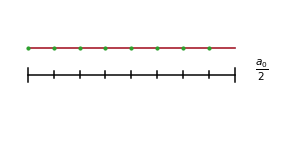

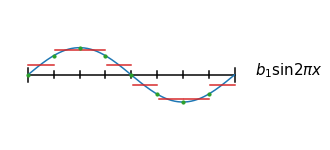

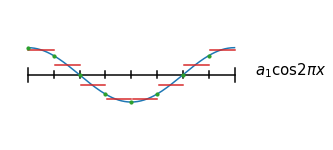

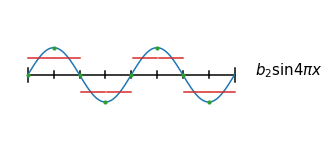

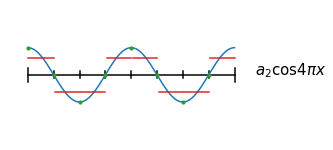

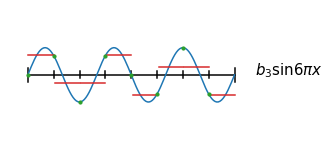

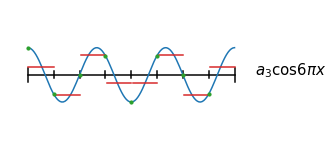

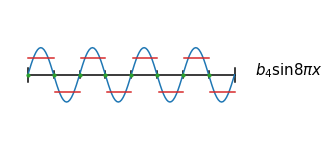

In [4]:
h = 1. / nh
xCell, waveXBasis = WT.MakeWaves(nh, h)
xNode, waveXBasisNode = WT.MakeNodeWaves(nh, h)
PT.PlotWaves(nh, waveXBasis, xNode, waveXBasisNode, plotNode = True)

In [5]:
fundFreq = np.cos(2. * np.pi * h) + (1j * np.sin(2. * np.pi * h))
kVals = list(np.arange(nh))
kVals = kVals
ks = [int((i + 1) / 2) for i in kVals]
print(ks)
diagVec = [fundFreq ** (k / 2.) for k in ks]
print(diagVec)
cellShift = np.zeros((nh, nh), complex)
fill_diagonal(cellShift, diagVec)
print('')
# waveXBasis = np.matmul(waveXBasis, cellShift)
cellFFT = h * np.fft.fft(waveXBasis)
waveKBasis = np.fft.fftshift(waveXBasis.T, axes = 1)
nodeFFT = h * np.fft.fft(waveXBasisNode)
print(cellFFT[0, 1] * cellShift[1, 1])
print(waveXBasis)

[0, 1, 1, 2, 2, 3, 3, 4]
[(1+0j), (0.9238795325112867+0.3826834323650897j), (0.9238795325112867+0.3826834323650897j), (0.7071067811865476+0.7071067811865475j), (0.7071067811865476+0.7071067811865475j), (0.38268343236509+0.9238795325112866j), (0.38268343236509+0.9238795325112866j), (2.220446049250313e-16+1j)]

(0.030072315926867006-0.0351141525980971j)
[[ 1.          0.37292323  0.90031632  0.63661977  0.63661977  0.72451862
   0.30010544  0.63661977]
 [ 1.          0.90031632  0.37292323  0.63661977 -0.63661977 -0.30010544
  -0.72451862 -0.63661977]
 [ 1.          0.90031632 -0.37292323 -0.63661977 -0.63661977 -0.30010544
   0.72451862  0.63661977]
 [ 1.          0.37292323 -0.90031632 -0.63661977  0.63661977  0.72451862
  -0.30010544 -0.63661977]
 [ 1.         -0.37292323 -0.90031632  0.63661977  0.63661977 -0.72451862
  -0.30010544  0.63661977]
 [ 1.         -0.90031632 -0.37292323  0.63661977 -0.63661977  0.30010544
   0.72451862 -0.63661977]
 [ 1.         -0.90031632  0.37292323 -0

In [6]:
print(waveKBasis)# np.matmul(cellFFT, cellShift))

[[ 1.          1.          1.          1.          1.          1.
   1.          1.        ]
 [-0.37292323 -0.90031632 -0.90031632 -0.37292323  0.37292323  0.90031632
   0.90031632  0.37292323]
 [-0.90031632 -0.37292323  0.37292323  0.90031632  0.90031632  0.37292323
  -0.37292323 -0.90031632]
 [ 0.63661977  0.63661977 -0.63661977 -0.63661977  0.63661977  0.63661977
  -0.63661977 -0.63661977]
 [ 0.63661977 -0.63661977 -0.63661977  0.63661977  0.63661977 -0.63661977
  -0.63661977  0.63661977]
 [-0.72451862  0.30010544  0.30010544 -0.72451862  0.72451862 -0.30010544
  -0.30010544  0.72451862]
 [-0.30010544  0.72451862 -0.72451862  0.30010544  0.30010544 -0.72451862
   0.72451862 -0.30010544]
 [ 0.63661977 -0.63661977  0.63661977 -0.63661977  0.63661977 -0.63661977
   0.63661977 -0.63661977]]


In [7]:
print(nodeFFT)

[[ 5.00000000e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   5.00000000e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 4.26776695e-01+0.00000000e+00j  3.66116524e-02-2.65165043e-01j
   1.25000000e-01-5.17766953e-02j  2.13388348e-01+8.83883476e-02j
  -1.76776695e-01+0.00000000e+00j  2.13388348e-01-8.83883476e-02j
   1.25000000e-01+5.17766953e-02j  3.66116524e-02+2.65165043e-01j]
 [-3.06161700e-17+0.00000000e+00j  4.26776695e-01-1.76776695e-01j
   1.53080850e-17-1.53080850e-17j  7.32233047e-02-1.76776695e-01j
   3.08148791e-33+0.00000000e+00j  7.32233047e-02+1.76776695e-01j
   1.53080850e-17+1.53080850e-17j  4.26776695e-01+1.76776695e-01j]
 [ 1.76776695e-01+0.00000000e+00j  2.13388348e-01+2.65165043e-01j
   1.25000000e-01-3.01776695e-01j  3.66116524e-02-8.83883476e-02j
   7.32233047e-02+0.00000000e+00j  3.66116524e-02+8.83883476e-02j
   1.25

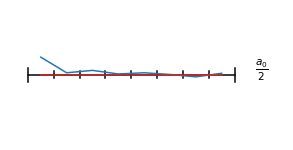

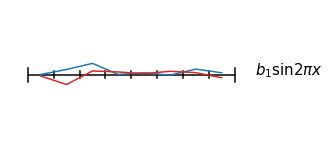

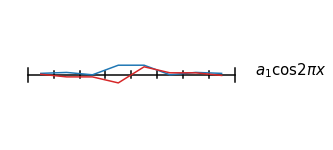

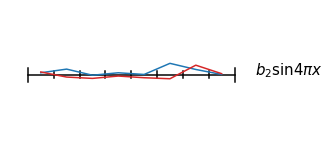

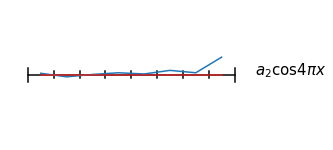

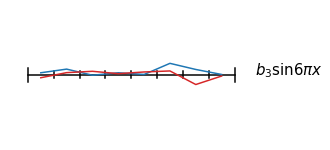

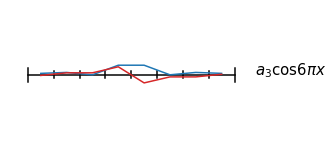

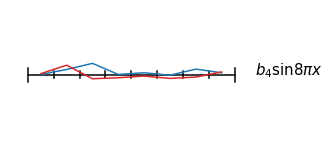

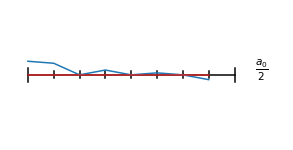

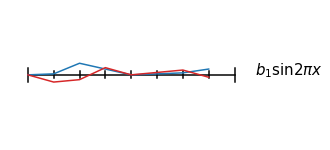

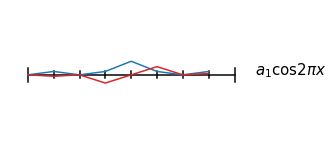

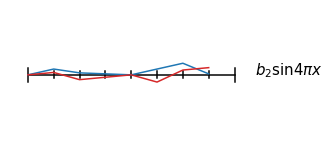

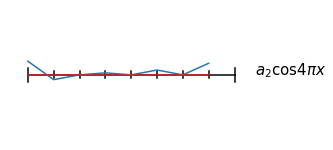

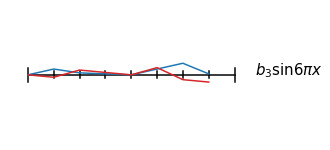

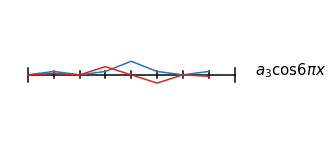

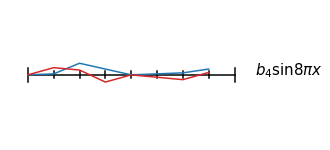

In [8]:
PT.PlotGeneralWaves(nh, xCell, cellFFT)
PT.PlotGeneralWaves(nh, xNode, nodeFFT)

This cell and all those below it just constitute a testing space.

In [9]:
points = 16
x = np.linspace(0, 1. - (1./points), num = points)
print(x)
s1 = np.sin(2 * np.pi * x)
print(s1)

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375]
[ 0.00000000e+00  3.82683432e-01  7.07106781e-01  9.23879533e-01
  1.00000000e+00  9.23879533e-01  7.07106781e-01  3.82683432e-01
  1.22464680e-16 -3.82683432e-01 -7.07106781e-01 -9.23879533e-01
 -1.00000000e+00 -9.23879533e-01 -7.07106781e-01 -3.82683432e-01]


In [10]:
s1fft = np.fft.fft(s1)
print(s1fft)

[-9.95799250e-17+0.00000000e+00j -1.26550410e-15-8.00000000e+00j
 -4.27067681e-16-6.60554663e-16j  1.91553812e-16-9.81427688e-16j
  2.33486982e-16-5.55111512e-16j  1.91553812e-16-9.32492680e-17j
  6.71997040e-16-4.38510058e-16j  3.92537761e-16+0.00000000e+00j
  1.22464680e-16+0.00000000e+00j  3.92537761e-16-0.00000000e+00j
  6.71997040e-16+4.38510058e-16j  1.91553812e-16+9.32492680e-17j
  2.33486982e-16+5.55111512e-16j  1.91553812e-16+9.81427688e-16j
 -4.27067681e-16+6.60554663e-16j -1.26550410e-15+8.00000000e+00j]


In [11]:
s1fft = np.round(s1fft)

In [12]:
s1fftshift = np.fft.fftshift(s1fft)

In [13]:
s1fftshift = (1. / points) * np.round(s1fftshift)
print(s1fftshift)

[ 0.+0.j   0.+0.j   0.+0.j   0.+0.j   0.+0.j   0.+0.j  -0.+0.j  -0.+0.5j
 -0.+0.j   0.-0.5j  0.-0.j   0.+0.j   0.+0.j   0.+0.j   0.+0.j   0.+0.j ]


In [14]:
c1 = np.cos(2 * np.pi * x)
print(c1)
print('')
c1fft = np.fft.fft(c1)
c1fftshift = np.fft.fftshift(c1fft)
c1fftshift = (1. / points) * np.round(c1fftshift)
print(c1fftshift)

[ 1.00000000e+00  9.23879533e-01  7.07106781e-01  3.82683432e-01
  6.12323400e-17 -3.82683432e-01 -7.07106781e-01 -9.23879533e-01
 -1.00000000e+00 -9.23879533e-01 -7.07106781e-01 -3.82683432e-01
 -1.83697020e-16  3.82683432e-01  7.07106781e-01  9.23879533e-01]

[ 0. +0.j  0. +0.j  0. +0.j  0. +0.j -0. +0.j -0. +0.j  0. +0.j  0.5+0.j
 -0. +0.j  0.5+0.j  0. +0.j  0. -0.j  0. -0.j  0. +0.j  0. +0.j  0. +0.j]


In [15]:
A = np.arange(nh ** 2).reshape(nh, nh)
O = 1 * A
print(A)
O[::2] = 0
print(O)
C = np.zeros((nh, nh), float)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]
[[ 0  0  0  0  0  0  0  0]
 [ 8  9 10 11 12 13 14 15]
 [ 0  0  0  0  0  0  0  0]
 [24 25 26 27 28 29 30 31]
 [ 0  0  0  0  0  0  0  0]
 [40 41 42 43 44 45 46 47]
 [ 0  0  0  0  0  0  0  0]
 [56 57 58 59 60 61 62 63]]


In [16]:
print(waveXBasis)

[[ 1.          0.37292323  0.90031632  0.63661977  0.63661977  0.72451862
   0.30010544  0.63661977]
 [ 1.          0.90031632  0.37292323  0.63661977 -0.63661977 -0.30010544
  -0.72451862 -0.63661977]
 [ 1.          0.90031632 -0.37292323 -0.63661977 -0.63661977 -0.30010544
   0.72451862  0.63661977]
 [ 1.          0.37292323 -0.90031632 -0.63661977  0.63661977  0.72451862
  -0.30010544 -0.63661977]
 [ 1.         -0.37292323 -0.90031632  0.63661977  0.63661977 -0.72451862
  -0.30010544  0.63661977]
 [ 1.         -0.90031632 -0.37292323  0.63661977 -0.63661977  0.30010544
   0.72451862 -0.63661977]
 [ 1.         -0.90031632  0.37292323 -0.63661977 -0.63661977  0.30010544
  -0.72451862  0.63661977]
 [ 1.         -0.37292323  0.90031632 -0.63661977  0.63661977 -0.72451862
   0.30010544 -0.63661977]]


In [17]:
print(waveXBasis.conj().T)

[[ 1.          1.          1.          1.          1.          1.
   1.          1.        ]
 [ 0.37292323  0.90031632  0.90031632  0.37292323 -0.37292323 -0.90031632
  -0.90031632 -0.37292323]
 [ 0.90031632  0.37292323 -0.37292323 -0.90031632 -0.90031632 -0.37292323
   0.37292323  0.90031632]
 [ 0.63661977  0.63661977 -0.63661977 -0.63661977  0.63661977  0.63661977
  -0.63661977 -0.63661977]
 [ 0.63661977 -0.63661977 -0.63661977  0.63661977  0.63661977 -0.63661977
  -0.63661977  0.63661977]
 [ 0.72451862 -0.30010544 -0.30010544  0.72451862 -0.72451862  0.30010544
   0.30010544 -0.72451862]
 [ 0.30010544 -0.72451862  0.72451862 -0.30010544 -0.30010544  0.72451862
  -0.72451862  0.30010544]
 [ 0.63661977 -0.63661977  0.63661977 -0.63661977  0.63661977 -0.63661977
   0.63661977 -0.63661977]]


In [18]:
def FindLaplaceEigVals(nh, h, waves):
    normalizations = [np.dot(waves[:, i], waves[:, i])**(-0.5) for i in range(nh)]
    normMatrix = np.zeros((nh, nh), float)
    fill_diagonal(normMatrix, normalizations)
    print(normMatrix)
    wavesNorm = np.matmul(waves, normMatrix)
    print(wavesNorm)
    wavesInv = LA.inv(wavesNorm)
    print('')
    print(wavesInv)
    print('')
    print(np.matmul(wavesInv, wavesNorm))
    Laplacian = OT.MakeLaplacian1D(nh, h)
    eigenvalues = np.matmul(wavesInv, np.matmul(Laplacian, wavesNorm))
    return eigenvalues

In [19]:
blah = FindLaplaceEigVals(nh, h, waveXBasis)
print(np.round(blah))

[[0.35355339 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.51308608 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.51308608 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.55536037 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.55536037 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.63758163
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.63758163 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.55536037]]
[[ 0.35355339  0.19134172  0.46193977  0.35355339  0.35355339  0.46193977
   0.19134172  0.35355339]
 [ 0.35355339  0.46193977  0.19134172  0.35355339 -0.35355339 -0.19134172
  -0.46193977 -0.35355339]
 [ 0.35355339  0.46193977 -0.19134172 -0.35355339 -0.35355339 -0.19134172
   0.46193977  0.35355339]
 [ 0.353